# Concept and idea
The general idea has not changed in this iteration.

Get a series of points for a shape, i.e. point cloud data, or a 2d version 
can the tesselation of voronoi work to put them in an order?

Start by creating a series of points and from those points a delaunay triangulation
## Convex hull 
A convex hull takes all the points generated from a all points given and will produce an object containing all points in a given point set, i.e. the outline of the shape. This might be of use here for the shaping of objects.

### Rough idea for this:
- Create a series of points and from those produce polygons
- These polygons will fit together and form a shape
- Display the polygons in a graph
- Isolate just one polygons to see what it would look like
- Randomly remove a polygon set
- Without changing the shape or proportion of the triangles make them all so that display at the same co-ords (or near enough)
- Work out what the seed points for the polygons would be and see if using voronoi tesselation can put them in a position where they match the original graph

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial import Delaunay

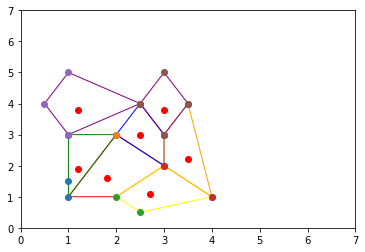

In [6]:
"""
- Create a series of points and from those produce polygons
- These polygons will fit together and form a shape
- Display the polygons in a graph
"""

# Define points for multiple polygons
polygon1_points = [(1, 1), (2, 3), (3, 2), (2, 1)]
polygon2_points = [(1,1), (2,3), (1,3), (1,1.5)]
polygon3_points = [(2, 3), (3, 2), (3, 3), (2.5, 4)]
polygon4_points = [(2, 1), (2.5, 0.5), (4, 1), (3, 2)]
polygon5_points = [(4, 1), (3, 2), (3, 3), (3.5, 4)]
polygon6_points = [(1, 3), (0.5, 4), (1, 5), (2.5, 4)]
polygon7_points = [(3, 3), (3.5, 4), (3, 5), (2.5, 4)]

# Create Polygon objects
polygon1 = Polygon(polygon1_points, closed=True, fill=None, edgecolor='r')
polygon2 = Polygon(polygon2_points, closed=True, fill=None, edgecolor='g')
polygon3 = Polygon(polygon3_points, closed=True, fill=None, edgecolor='b')
polygon4 = Polygon(polygon4_points, closed=True, fill=None, edgecolor='yellow')
polygon5 = Polygon(polygon5_points, closed=True, fill=None, edgecolor='orange')
polygon6 = Polygon(polygon6_points, closed=True, fill=None, edgecolor='purple')
polygon7 = Polygon(polygon7_points, closed=True, fill=None, edgecolor='purple')

# Plot polygons
plt.gca().add_patch(polygon1)
plt.gca().add_patch(polygon2)
plt.gca().add_patch(polygon3)
plt.gca().add_patch(polygon4)
plt.gca().add_patch(polygon5)
plt.gca().add_patch(polygon6)
plt.gca().add_patch(polygon7)

# Function to calculate centroid of a polygon
def calculate_centroid(points):
    x = [p[0] for p in points]
    y = [p[1] for p in points]
    centroid_x = np.mean(x)
    centroid_y = np.mean(y)
    return centroid_x, centroid_y

# Calculate centroids for each polygon
centroids = [calculate_centroid(points) for points in [polygon1.xy, polygon2.xy, polygon3.xy,polygon4.xy,polygon5.xy,polygon6.xy,polygon7.xy]]

# Extract x and y coordinates of centroids
centroids_x = [centroid[0] for centroid in centroids]
centroids_y = [centroid[1] for centroid in centroids]

# Plot points
for polygon_points in [polygon2_points, polygon3_points, polygon4_points,polygon5_points,polygon6_points,polygon7_points]:
    x = [point[0] for point in polygon_points]
    y = [point[1] for point in polygon_points]
    plt.scatter(x, y)

    
# Plot centroids
plt.scatter(centroids_x, centroids_y, color='red', marker='o')


# Set plot limits
plt.xlim(0, 7)
plt.ylim(0, 7)

plt.show()


Centroids: [(1.6666666666666667, 1.3333333333333333), (1.5, 2.125), (1.5, 3.25), (2.3, 3.4), (2.125, 2.5), (2.5, 1.7), (3.25, 2.0833333333333335), (3.5, 3.5)]


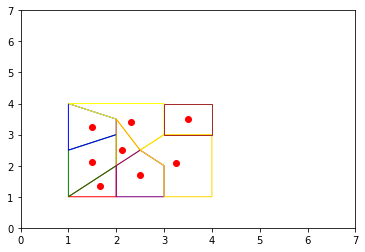

Path(array([[1., 1.],
       [2., 1.],
       [2., 2.],
       [1., 1.]]), array([ 1,  2,  2, 79], dtype=uint8))


In [9]:
def compute_centroid(polygon):
    # Extract x and y coordinates of polygon vertices
    x_coords = [point[0] for point in polygon]
    y_coords = [point[1] for point in polygon]
    # Compute centroid
    centroid_x = np.mean(x_coords)
    centroid_y = np.mean(y_coords)
    return (centroid_x, centroid_y)

polygons = [
    [(1,1),(2,1),(2,2)],
    [(1,1),(2,2),(2,3),(1,2.5)],
    [(1,2.5),(2,3),(2,3.5),(1,4)],
    [(1,4),(2,3.5),(2.5,2.5),(3,3),(3,4)],
    [(2,2),(2.5,2.5),(2,3.5),(2,2)],
    [(2,1),(3,1),(3,2),(2.5,2.5),(2,2)],
    [(3,1),(4,1),(4,3),(3,3),(2.5,2.5),(3,2)],
    [(3,3),(4,3),(4,4),(3,4)]
]

# Create Polygon objects
polygon1 = Polygon(polygons[0], closed=True, fill=None, edgecolor='red')
polygon2 = Polygon(polygons[1], closed=True, fill=None, edgecolor='green')
polygon3 = Polygon(polygons[2], closed=True, fill=None, edgecolor='blue')
polygon4 = Polygon(polygons[3], closed=True, fill=None, edgecolor='yellow')
polygon5 = Polygon(polygons[4], closed=True, fill=None, edgecolor='orange')
polygon6 = Polygon(polygons[5], closed=True, fill=None, edgecolor='purple')
polygon7 = Polygon(polygons[6], closed=True, fill=None, edgecolor='gold')
polygon8 = Polygon(polygons[7], closed=True, fill=None, edgecolor='brown')

polys = [polygon1,polygon2, polygon3, polygon4,polygon5,polygon6,polygon7,polygon8]

# Plot polygons
plt.gca().add_patch(polygon1)
plt.gca().add_patch(polygon2)
plt.gca().add_patch(polygon3)
plt.gca().add_patch(polygon4)
plt.gca().add_patch(polygon5)
plt.gca().add_patch(polygon6)
plt.gca().add_patch(polygon7)
plt.gca().add_patch(polygon8)

# Compute centroids for each polygon
centroids = [compute_centroid(polygon) for polygon in polygons]

# Extract x and y coordinates of centroids
centroids_x = [centroid[0] for centroid in centroids]
centroids_y = [centroid[1] for centroid in centroids]

print("Centroids:", centroids)
# Plot centroids
plt.scatter(centroids_x, centroids_y, color='red', marker='o')


# Set plot limits
plt.xlim(0, 7)
plt.ylim(0, 7)

plt.show()
print(polygon1.get_path())

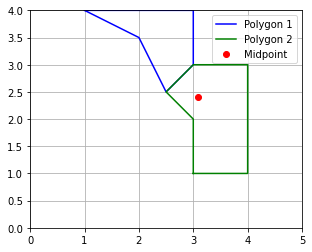

In [11]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point

# Example polygons
polygon1 = Polygon([(1,4),(2,3.5),(2.5,2.5),(3,3),(3,4)])
polygon2 = Polygon([(3,1),(4,1),(4,3),(3,3),(2.5,2.5),(3,2)])

# Find the closest pair of points on the boundaries of the polygons
closest_points = polygon1.boundary.interpolate(polygon1.boundary.project(polygon2.centroid))

# Calculate the midpoint between the closest points
midpoint = Point((closest_points.x + polygon2.centroid.x) / 2, (closest_points.y + polygon2.centroid.y) / 2)

# Plot polygons
plt.figure()
plt.plot(*polygon1.exterior.xy, label='Polygon 1', color='blue')
plt.plot(*polygon2.exterior.xy, label='Polygon 2', color='green')

# Plot midpoint
plt.plot(midpoint.x, midpoint.y, 'ro', label='Midpoint')

# Set plot limits
plt.xlim(0, 5)
plt.ylim(0, 4)

plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.grid(True)
plt.show()


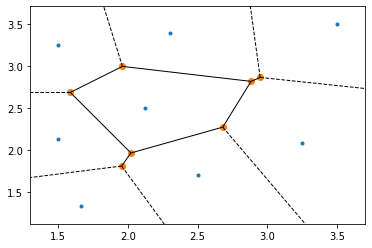

In [5]:
centroids_combined = [(x, y) for x, y in zip(centroids_x, centroids_y)]
vor = Voronoi(centroids_combined)
# Plot
voronoi_plot_2d(vor)
plt.show()

In [ ]:
"""
- Without changing the shape or proportion of the triangles make them all so that display at the same co-ords (or near enough)
"""

# Define points for multiple polygons (without specifying origin)
polygon1_points = [(0, 0), (1, 2), (2, 1), (1, 0)]
polygon2_points = [(0, 0), (1, 2), (0, 2), (0, 1.5)]
polygon3_points = [(1, 2), (2, 1), (2, 2), (1.5, 3)]
polygon4_points = [(1, 0), (1.5, -0.5), (3, 0), (2, 1)]
polygon5_points = [(3, 0), (2, 1), (2, 2), (2.5, 3)]
polygon6_points = [(0, 2), (-0.5, 3), (0, 4), (1.5, 3)]
polygon7_points = [(2, 2), (2.5, 3), (2, 4), (1.5, 3)]

# Function to shift polygon points by a given offset
def shift_polygon(points, offset):
    return [(point[0] + offset[0], point[1] + offset[1]) for point in points]

# Create shifted polygon points
shifted_polygons = [
    shift_polygon(polygon1_points, (1, 1)),
    shift_polygon(polygon2_points, (2, 2)),
    shift_polygon(polygon3_points, (3, 3)),
    shift_polygon(polygon4_points, (4, 1)),
    shift_polygon(polygon5_points, (5, 1)),
    shift_polygon(polygon6_points, (6, 2)),
    shift_polygon(polygon7_points, (7, 3))
]

# Function to calculate centroid of a polygon
def calculate_centroid(points):
    x = [p[0] for p in points]
    y = [p[1] for p in points]
    centroid_x = np.mean(x)
    centroid_y = np.mean(y)
    return centroid_x, centroid_y

# Calculate centroids for each polygon
centroids = [calculate_centroid(points) for points in [shifted_polygons[0], shifted_polygons[1], shifted_polygons[2], shifted_polygons[3], shifted_polygons[4], shifted_polygons[5], shifted_polygons[6]]]

# Extract x and y coordinates of centroids
centroids_x = [centroid[0] for centroid in centroids]
centroids_y = [centroid[1] for centroid in centroids]

# Create Polygon objects
polygons = [Polygon(points, closed=True, fill=None) for points in shifted_polygons]

# Plot polygons
plt.figure()
for polygon in polygons:
    plt.gca().add_patch(polygon)
# Plot centroids
plt.scatter(centroids_x, centroids_y, color='red', marker='o')
# Set plot limits
plt.xlim(0, 10)
plt.ylim(0, 10)

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Create a list of points (x, y)
polygon1_points = [(1, 1), (2, 3), (3, 2), (2, 1)]
polygon2_points = [(1,1), (2,3), (1,3), (1,1.5)]
polygon3_points = [(2, 3), (3, 2), (3, 3), (2.5, 4)]
polygon4_points = [(2, 1), (2.5, 0.5), (4, 1), (3, 2)]
polygon5_points = [(4, 1), (3, 2), (3, 3), (3.5, 4)]
polygon6_points = [(1, 3), (0.5, 4), (1, 5), (2.5, 4)]
polygon7_points = [(3, 3), (3.5, 4), (3, 5), (2.5, 4)]

# Create a Shapely Polygon object
#polygon = Polygon(points)

def create_polygons(*points):
    polys = []
    for x in points:
        polys.append(Polygon(x))
    return polys

def get_coords(pol):
    xycords = []
    for apol in pol:
        print("apol "+str(apol))
        x, y = apol.exterior.xy
        xycords.append((x,y))
    print("xycords is: "+str(xycords))
    return xycords

def create_plt(cord_sets):
    print("cord_set is: " +str(cord_sets))
    for pts in cord_sets:
        plt.plot(pts[0], pts[1])
        plt.scatter(*zip(*pts))   
        
pols = create_polygons(polygon1_points,polygon2_points,polygon3_points,polygon4_points,polygon5_points,polygon6_points,polygon7_points)
#pols = create_polygons(polygon1_points)
coords = get_coords(pols)

for coords in [pols]:
    x, y = zip(*coords)  # Unzip coordinates
    plt.plot(x, y)
    plt.fill(x, y, alpha=0.3)  # Fill the polygon area
    
#create_plt(coords)
#print(coords)
# Plot the polygon
#plt.plot(x, y)

# Plot the points
#plt.scatter(*zip(*points))

#plt.show()
